# 4.3
## 1.
### Imports

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### Ler os dados

In [10]:
dados_lidos = pd.read_csv("CO_data.csv")

### Variáveis

In [11]:
# Listas de paises e anos
areas_geo = ["Europe", "Germany", "Russia", "France", "Portugal"]
anos = list(range(2000, 2022))[::2]

# Definição das condições de filtragem.
condicao_anos = dados_lidos["year"].isin(anos)

### Obter dados dos anos pretendidos para as áreas geográficas em estudo.

In [12]:
dados_areas_geo = {}

for area_geo in areas_geo:
    condicao_area_geo = dados_lidos.country == area_geo
    dados_areas_geo[area_geo] = list(dados_lidos.loc[condicao_anos & condicao_area_geo, ["co2"]]["co2"])

dados_trabalho = pd.DataFrame(dados_areas_geo)
# dados_trabalho.insert(0, "year", anos)

In [13]:
# Espreitar os dados filtrados
dados_trabalho.head()

,Europe,Germany,Russia,France,Portugal
0,6158.767,899.352,1478.185,406.829,65.686
1,6254.075,899.450,1505.520,407.790,69.643
2,6431.065,886.637,1541.754,413.780,67.385
3,6520.084,877.939,1618.246,406.462,64.924
4,6402.666,854.508,1646.969,390.778,60.107


### Verificação dos pressupostos



#### Homocedasticidade (Variâncias iguais)

$H_0$: As amostras têm variâncias iguais
$H_1$: As amostras não têm variâncias iguais

In [14]:
lista_dados = list(dados_areas_geo.values())
result_levene = stats.levene(*lista_dados)
print(f"Estatistica: {result_levene.statistic}\np-value: {result_levene.pvalue}")


Estatistica: 11.144599886373852
p-value: 1.534967635016513e-06


Como o valor de p-value é muito baixo (próximo de zero) rejeitamos a hipótese nula, ou seja, consideramos que as variâncias não são iguais.

#### Normalidade (shapiro)

In [15]:
stats.shapiro(dados_trabalho)

ShapiroResult(statistic=0.7063598521682005, pvalue=3.4768901800969153e-09)

#### Boxplot

C:\Users\paulo\AppData\Local\Temp\ipykernel_21404\4192385510.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_bp.show()


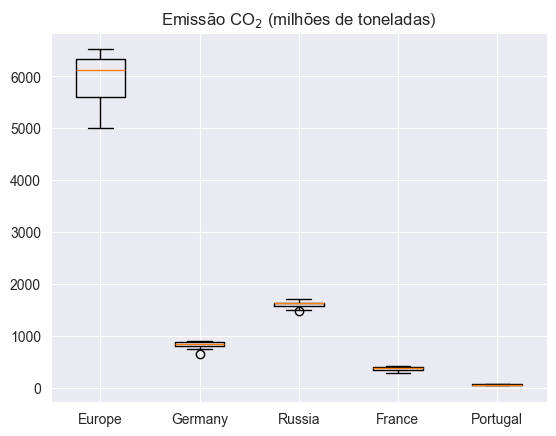

In [16]:
fig_bp, ax_bp = plt.subplots()
emissoes_areas_geo = list(dados_areas_geo.values())
# boxplot = ax_bp.boxplot(emissoes_areas_geo, labels=areas_geo)
boxplot = ax_bp.boxplot(dados_trabalho, labels=areas_geo)
ax_bp.set_title(r"Emissão CO$_2$ (milhões de toneladas)")
fig_bp.show()


### Tabela de correlação

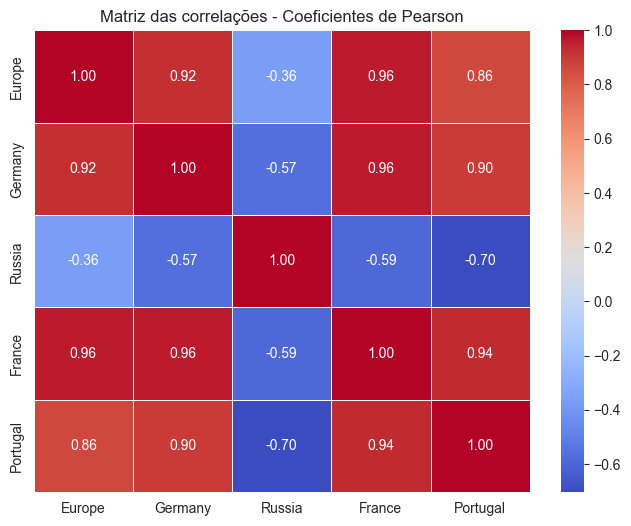

In [17]:
matriz_das_correlacoes = dados_trabalho.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_das_correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz das correlações - Coeficientes de Pearson')
plt.show()